In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
!ls ./data

Riders.csv
SampleSubmission.csv
Test.csv
Train.csv
VariableDefinitions.csv


In [5]:
df = pd.read_csv('./data/Train.csv')
df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [3]:
df.isnull().sum()

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

In [4]:
# we convert the columns to be date time assuming the month of jan
placeholder_month = 1
placeholder_year = 2019

df['Placement_Datetime'] = pd.to_datetime(
    df['Placement - Day of Month'].astype(str) + '-' +
    str(placeholder_month) + '-' +
    str(placeholder_year) + ' ' +
    df['Placement - Time'],
    format='%d-%m-%Y %I:%M:%S %p'  
)

In [5]:
df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,Placement_Datetime
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,2019-01-09 09:35:46
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,2019-01-12 11:16:16
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,2019-01-30 12:39:25
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,2019-01-15 09:25:34
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,2019-01-13 09:55:18


In [6]:
#The columns we are going to use

essential_cols = [
    'Order No',            
    'Placement_Datetime',  
    'Personal or Business',
    'Platform Type',
    'Pickup Lat', 
    'Pickup Long'          
]


df_focused = df[essential_cols].copy()



In [7]:
df_focused.head()

,Order No,Placement_Datetime,Personal or Business,Platform Type,Pickup Lat,Pickup Long
0,Order_No_4211,2019-01-09 09:35:46,Business,3,-1.317755,36.830370
1,Order_No_25375,2019-01-12 11:16:16,Personal,3,-1.351453,36.899315
2,Order_No_1899,2019-01-30 12:39:25,Business,3,-1.308284,36.843419
3,Order_No_9336,2019-01-15 09:25:34,Business,3,-1.281301,36.832396
4,Order_No_27883,2019-01-13 09:55:18,Personal,1,-1.266597,36.792118


In [8]:
import folium
from folium.plugins import HeatMap

#Visualize the pick up location using latitude and longitude
heat_data = df_focused[['Pickup Lat', 'Pickup Long']].values.tolist()
nairobi_map = folium.Map(location=[-1.286389, 36.817223], zoom_start=12)
HeatMap(heat_data).add_to(nairobi_map)
print("Displaying Heat Map of Pickup Locations...")
nairobi_map

Displaying Heat Map of Pickup Locations...


In [9]:
# Extracting the  numerical features from the date
df_focused['hour_of_day'] = df_focused['Placement_Datetime'].dt.hour
df_focused['day_of_week'] = df_focused['Placement_Datetime'].dt.dayofweek
df_focused.head()

,Order No,Placement_Datetime,Personal or Business,Platform Type,Pickup Lat,Pickup Long,hour_of_day,day_of_week
0,Order_No_4211,2019-01-09 09:35:46,Business,3,-1.317755,36.830370,9,2
1,Order_No_25375,2019-01-12 11:16:16,Personal,3,-1.351453,36.899315,11,5
2,Order_No_1899,2019-01-30 12:39:25,Business,3,-1.308284,36.843419,12,2
3,Order_No_9336,2019-01-15 09:25:34,Business,3,-1.281301,36.832396,9,1
4,Order_No_27883,2019-01-13 09:55:18,Personal,1,-1.266597,36.792118,9,6


In [10]:
#converting the longitude and latitude into h3 cells
!pip install h3

import h3

H3_RESOLUTION = 12

def latlon_to_h3(row):
    return h3.latlng_to_cell(row['Pickup Lat'], row['Pickup Long'], H3_RESOLUTION)

# Apply the function to every row to create the new 'h3_cell' column.
df_focused['h3_cell'] = df_focused.apply(latlon_to_h3, axis=1)
df_focused.head()

,Order No,Placement_Datetime,Personal or Business,Platform Type,Pickup Lat,Pickup Long,hour_of_day,day_of_week,h3_cell
0,Order_No_4211,2019-01-09 09:35:46,Business,3,-1.317755,36.830370,9,2,8c7a6e5507b51ff
1,Order_No_25375,2019-01-12 11:16:16,Personal,3,-1.351453,36.899315,11,5,8c7a6e50eaccdff
2,Order_No_1899,2019-01-30 12:39:25,Business,3,-1.308284,36.843419,12,2,8c7a6e552c4bdff
3,Order_No_9336,2019-01-15 09:25:34,Business,3,-1.281301,36.832396,9,1,8c7a6e42c4629ff
4,Order_No_27883,2019-01-13 09:55:18,Personal,1,-1.266597,36.792118,9,6,8c7a6e4291433ff


In [11]:
#We binary encode the personal/business column
df_focused['is_business'] = df_focused['Personal or Business'].apply(lambda x: 1 if x == 'Business' else 0)
#preview
df_focused[['Personal or Business', 'is_business']].head()

,Personal or Business,is_business
0,Business,1
1,Personal,0
2,Business,1
3,Business,1
4,Personal,0


In [12]:
df_focused.shape

(21201, 10)

In [13]:
#we try to group by location cell and the date- day and hour of the week
demand_counts = df_focused.groupby(['h3_cell', 'day_of_week', 'hour_of_day']).size().reset_index(name='demand_count')
business_proportion = df_focused.groupby(['h3_cell', 'day_of_week', 'hour_of_day'])['is_business'].mean().reset_index(name='business_ratio')

#we merge both dataframes
df_model_ready = pd.merge(demand_counts, business_proportion, on=['h3_cell', 'day_of_week', 'hour_of_day'])

print(df_model_ready.shape)
df_model_ready.head()

(12194, 5)


,h3_cell,day_of_week,hour_of_day,demand_count,business_ratio
0,8c7a6e090831bff,0,12,1,0.0
1,8c7a6e090831bff,1,15,1,1.0
2,8c7a6e090ca63ff,6,8,1,0.0
3,8c7a6e0929845ff,6,12,1,1.0
4,8c7a6e0947819ff,0,13,1,0.0


In [14]:
#convert h3 into 
df_model_ready['h3_cell'] = df_model_ready['h3_cell'].astype('category')
df_model_ready.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12194 entries, 0 to 12193
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   h3_cell         12194 non-null  category
 1   day_of_week     12194 non-null  int64   
 2   hour_of_day     12194 non-null  int64   
 3   demand_count    12194 non-null  int64   
 4   business_ratio  12194 non-null  float64 
dtypes: category(1), float64(1), int64(3)
memory usage: 688.6 KB


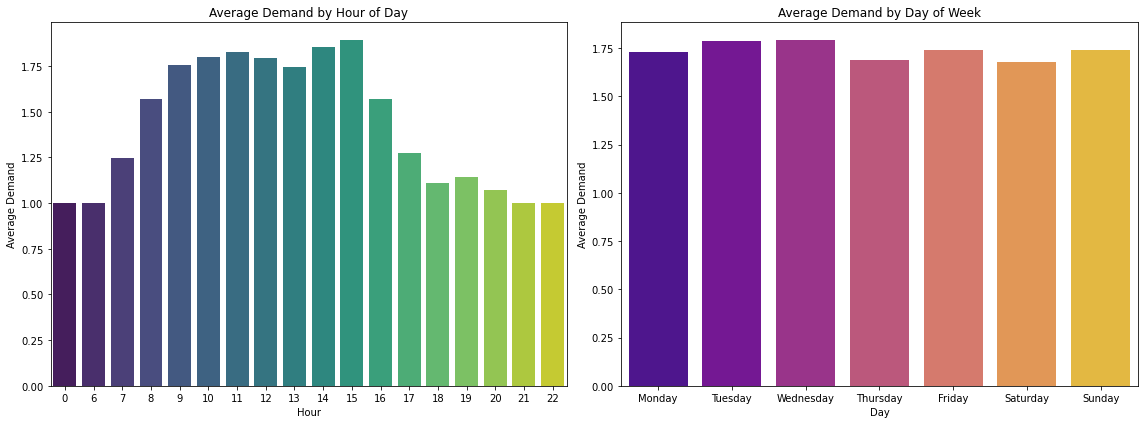

In [15]:

# Group by hour and day to see the patterns
hourly_demand = df_model_ready.groupby('hour_of_day')['demand_count'].mean()
daily_demand = df_model_ready.groupby('day_of_week')['demand_count'].mean()
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

#create the plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

#hourly Demand Plot
sns.barplot(x=hourly_demand.index, y=hourly_demand.values, ax=ax1, palette='viridis')
ax1.set_title('Average Demand by Hour of Day')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Average Demand')

#Daily Demand Plot
sns.barplot(x=day_names, y=daily_demand.values, ax=ax2, palette='plasma')
ax2.set_title('Average Demand by Day of Week')
ax2.set_xlabel('Day')
ax2.set_ylabel('Average Demand')

plt.tight_layout()
plt.show()

In [16]:
#Before we start modelling we have to split our data to features and target
features = ['h3_cell', 'day_of_week', 'hour_of_day', 'business_ratio']
target = 'demand_count'

X = df_model_ready[features]
y = df_model_ready[target]
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12194 entries, 0 to 12193
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   h3_cell         12194 non-null  category
 1   day_of_week     12194 non-null  int64   
 2   hour_of_day     12194 non-null  int64   
 3   business_ratio  12194 non-null  float64 
dtypes: category(1), float64(1), int64(2)
memory usage: 593.4 KB


In [17]:
from sklearn.model_selection import train_test_split

#splitting the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_val.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_val.shape}")

Shape of X_train: (9755, 4)
Shape of X_test: (2439, 4)
Shape of y_train: (9755,)
Shape of y_test: (2439,)


## Modelling
### LightGBM


In [18]:
import lightgbm as lgb

#instaniate the model
lgbm = lgb.LGBMRegressor(random_state=42)

#the model fit
lgbm.fit(X_train, y_train, categorical_feature=['h3_cell'])

print("--- Model Training Complete! ---")

[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001063 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 754
[LightGBM] [Info] Number of data points in the train set: 9755, number of used features: 4
[LightGBM] [Info] Start training from score 1.771707
--- Model Training Complete! ---


A visualization of the feature importance


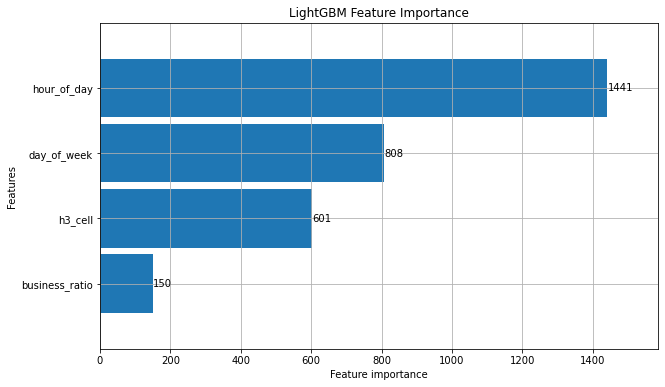

In [19]:

print("A visualization of the feature importance")

lgb.plot_importance(lgbm, height=0.9, figsize=(10, 6))
plt.title("LightGBM Feature Importance")
plt.show()

In [20]:
#Model evaluation
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = lgbm.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("--- Model Evaluation Results ---")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# comapring few predictions vs the actual values
comparison_df = pd.DataFrame({'Actual': y_val, 'Predicted': y_pred})
print("\nSample of Actual vs. Predicted demand:")
print(comparison_df.head(10))

--- Model Evaluation Results ---
Mean Absolute Error (MAE): 0.41
R-squared (R²): 0.86

Sample of Actual vs. Predicted demand:
       Actual  Predicted
5700        2   0.722886
11022       1   1.017240
6062        1   1.348335
2221        1   0.993542
429         4   1.517652
7942        1   1.050034
304         1   1.524425
1010        2   1.018311
6220        1   1.050825
1142        3   3.398914


### Observations from Sample Predictions
* **MAE of 0.41:** Your model's predictions are, on average, within 0.41 units of the actual `demand_count`.
* **R-squared of 0.86:** Your model effectively explains 86% of the variability observed in the `demand_count`.
* **Accuracy for Low Demand:** For `Actual` values of 1, your model often predicts values very close to 1 (e.g., 1.017240, 0.993542, 1.050034). This suggests good accuracy for low demand scenarios.
* **Variability for Moderate Demand:** For `Actual` values of 2, the predictions are a bit more varied (e.g., 0.722886, 1.018311). The first one (0.72) shows a larger error compared to others.
* **Challenges with Higher Demand:** For `Actual` values like 3 and 4, the model seems to struggle more. For `Actual` 4, it predicted 1.517652, which is quite far off. However, for `Actual` 3, it predicted 3.398914, which is very close. This indicates that while the model performs well on average, its accuracy might vary for different demand levels, particularly for higher ones.


In [21]:
#!conda update pandas

### Xgboost model

In [22]:
#Install XGBoost
#!pip install --upgrade xgboost

import xgboost as xgb

X_train_xgb = X_train.copy()
X_val_xgb = X_val.copy()

#we need to convert the categorical h3 column into integer for the model
X_train_xgb['h3_cell'] = X_train_xgb['h3_cell'].cat.codes
X_val_xgb['h3_cell'] = X_val_xgb['h3_cell'].cat.codes

#initialize and train model
xgb_reg = xgb.XGBRegressor(
    objective='reg:squarederror',
    tree_method='hist',
    enable_categorical=True,  
    random_state=42
)
xgb_reg.fit(np.array(X_train_xgb), y_train)
print ('finished fitting')

finished fitting


In [23]:
#Evaluate the XGBoost Model ---
y_pred_xgb = xgb_reg.predict(np.array(X_val_xgb))
mae_xgb = mean_absolute_error(y_val, y_pred_xgb)
r2_xgb = r2_score(y_val, y_pred_xgb)

print("\n--- XGBoost Evaluation Results ---")
print(f"Mean Absolute Error (MAE): {mae_xgb:.2f}")
print(f"R-squared (R²): {r2_xgb:.2f}")

# comparing few predictions vs the actual values
comparison_df_xgb = pd.DataFrame({'Actual': y_val, 'Predicted': y_pred_xgb})
print("\nSample of Actual vs. Predicted demand:")
print(comparison_df_xgb.head(10))


--- XGBoost Evaluation Results ---
Mean Absolute Error (MAE): 0.62
R-squared (R²): 0.27

Sample of Actual vs. Predicted demand:
       Actual  Predicted
5700        2   1.348586
11022       1   0.967868
6062        1   1.102278
2221        1   0.790272
429         4   1.570777
7942        1   1.028563
304         1   1.178446
1010        2   1.216225
6220        1   1.223373
1142        3   3.149368


## Catboost model

In [66]:
# In a new cell
!pip install catboost
from catboost import CatBoostRegressor


cat_features = ['h3_cell']

cat_reg = CatBoostRegressor(
    iterations=500,  # Let it run for a bit longer
    verbose=0,       # Suppress the training output
    cat_features=cat_features,
    random_state=42
)

# Train the model
print("--- Training CatBoost Model... ---")
cat_reg.fit(X_train, y_train)

# --- ACTION 3: Evaluate the CatBoost Model ---
y_pred_cat = cat_reg.predict(X_test)
mae_cat = mean_absolute_error(y_test, y_pred_cat)
r2_cat = r2_score(y_test, y_pred_cat)

print("\n--- CatBoost Evaluation Results ---")
print(f"Mean Absolute Error (MAE): {mae_cat:.2f}")
print(f"R-squared (R²): {r2_cat:.2f}")

ValueError: numpy.ndarray size changed, may indicate binary incompatibility. Expected 96 from C header, got 80 from PyObject

## Neural Network

The best type of neural network to start with, given this structure, is a Multi-Layer Perceptron (MLP), also known as a Feed-Forward Neural Network, enhanced with Embedding Layers for your categorical features.

In [30]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9755 entries, 3160 to 7270
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   h3_cell         9755 non-null   category
 1   day_of_week     9755 non-null   int64   
 2   hour_of_day     9755 non-null   int64   
 3   business_ratio  9755 non-null   float64 
dtypes: category(1), float64(1), int64(2)
memory usage: 512.4 KB


In [57]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler

# Copy datasets
X_train_nn = X_train.copy()
X_val_nn = X_val.copy()

# Ensure consistent category mapping
combined = pd.concat([X_train['h3_cell'], X_val['h3_cell']], axis=0).astype('category')
combined = combined.cat.set_categories(combined.unique())  # optional but safe

# Assign consistent codes
X_train_nn['h3_cell'] = combined[:len(X_train)].cat.codes
X_val_nn['h3_cell'] = combined[len(X_train):].cat.codes

# Get unique counts for embeddings
num_h3_cells = combined.nunique()+1
num_days = 7
num_hours = 24

# Embedding dimensions
h3_embedding_dim = min(50, num_h3_cells // 2)
day_embedding_dim = min(50, num_days // 2)
hour_embedding_dim = min(50, num_hours // 2)

# Scale the numerical column
scaler = MinMaxScaler()
X_train_nn['business_ratio'] = scaler.fit_transform(X_train_nn[['business_ratio']])
X_val_nn['business_ratio'] = scaler.transform(X_val_nn[['business_ratio']])

# Optional: Check info
print(X_val_nn.info())
X_train_nn.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2439 entries, 5700 to 6389
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   h3_cell         2439 non-null   int16  
 1   day_of_week     2439 non-null   int64  
 2   hour_of_day     2439 non-null   int64  
 3   business_ratio  2439 non-null   float64
dtypes: float64(1), int16(1), int64(2)
memory usage: 81.0 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9755 entries, 3160 to 7270
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   h3_cell         9755 non-null   int16  
 1   day_of_week     9755 non-null   int64  
 2   hour_of_day     9755 non-null   int64  
 3   business_ratio  9755 non-null   float64
dtypes: float64(1), int16(1), int64(2)
memory usage: 323.9 KB


In [58]:
# Input layers
input_h3 = layers.Input(shape=(1,), name='h3_cell')
input_day = layers.Input(shape=(1,), name='day_of_week')
input_hour = layers.Input(shape=(1,), name='hour_of_day')
input_num = layers.Input(shape=(1,), name='business_ratio')

# Embedding layers
embed_h3 = layers.Embedding(input_dim=num_h3_cells, output_dim=h3_embedding_dim)(input_h3)
embed_day = layers.Embedding(input_dim=num_days, output_dim=day_embedding_dim)(input_day)
embed_hour = layers.Embedding(input_dim=num_hours, output_dim=hour_embedding_dim)(input_hour)

# Flatten embeddings
flat_h3 = layers.Flatten()(embed_h3)
flat_day = layers.Flatten()(embed_day)
flat_hour = layers.Flatten()(embed_hour)

# Concatenate all features
x = layers.Concatenate()([flat_h3, flat_day, flat_hour, input_num])

# Dense layers
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
output = layers.Dense(1)(x) 

# Compile model
model = keras.Model(inputs=[input_h3, input_day, input_hour, input_num], outputs=output)
model.compile(optimizer='adam', loss='mse') 
model.summary()


Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
h3_cell (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
day_of_week (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
hour_of_day (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_9 (Embedding)         (None, 1, 50)        182400      h3_cell[0][0]                    
_______________________________________________________________________________________

In [59]:
print(X_val_nn['h3_cell'].tail(10))
X_train_nn['h3_cell'].tail(10)


8651       59
8076     1365
4123     3646
7136       84
6958      334
10830     463
11934    1633
5050      211
467       514
6389      327
Name: h3_cell, dtype: int16


4426      889
466       514
6265     1911
5734      376
11284    3226
11964     407
5191      550
5390        7
860      2287
7270      846
Name: h3_cell, dtype: int16

In [65]:
history = model.fit(
    x={
        'h3_cell': X_train_nn['h3_cell'],
        'day_of_week': X_train_nn['day_of_week'],
        'hour_of_day': X_train_nn['hour_of_day'],
        'business_ratio': X_train_nn['business_ratio']
    },
    y=y_train,
    validation_data=(
        {
            'h3_cell': X_val_nn['h3_cell'],
            'day_of_week': X_val_nn['day_of_week'],
            'hour_of_day': X_val_nn['hour_of_day'],
            'business_ratio': X_val_nn['business_ratio']
        },
        y_val
    ),
    epochs=20,
    batch_size=32
)

Epoch 1/20
305/305 [==============================] - 1s 4ms/step - loss: 0.9127 - val_loss: 1.1198
Epoch 2/20
305/305 [==============================] - 2s 5ms/step - loss: 0.9363 - val_loss: 1.1169
Epoch 3/20
305/305 [==============================] - 2s 6ms/step - loss: 0.8699 - val_loss: 1.1398
Epoch 4/20
305/305 [==============================] - 2s 6ms/step - loss: 0.8542 - val_loss: 1.2323
Epoch 5/20
305/305 [==============================] - 2s 6ms/step - loss: 0.8386 - val_loss: 1.0805
Epoch 6/20
305/305 [==============================] - 2s 6ms/step - loss: 0.8872 - val_loss: 1.2757
Epoch 7/20
305/305 [==============================] - 2s 6ms/step - loss: 0.7898 - val_loss: 1.1872
Epoch 8/20
305/305 [==============================] - 2s 6ms/step - loss: 0.8540 - val_loss: 1.2059
Epoch 9/20
305/305 [==============================] - 2s 5ms/step - loss: 0.8144 - val_loss: 1.3767
Epoch 10/20
305/305 [==============================] - 1s 5ms/step - loss: 0.8154 - val_loss: 1.1398

In [63]:
# Predict on validation set
y_pred = model.predict({
    'h3_cell': X_val_nn['h3_cell'],
    'day_of_week': X_val_nn['day_of_week'],
    'hour_of_day': X_val_nn['hour_of_day'],
    'business_ratio': X_val_nn['business_ratio']
})

# Evaluate
print("RMSE:", mean_squared_error(y_val, y_pred, squared=False))
print("R²:", r2_score(y_val, y_pred))


RMSE: 1.128797611029752
R²: 0.7953302034553694
